In [3]:
# Example taken from Scikit Image
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html

# If you don't have Scikit image yet, install it first.
# conda install scikit-image

In [1]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

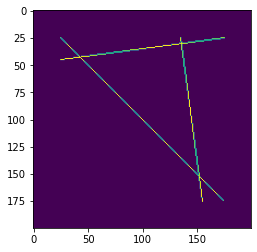

In [5]:
# Constructing test image

image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[line(45, 25, 25, 175)] = 255
image[line(25, 135, 175, 155)] = 255

plt.imshow(image)

(566, 360) (360,) (566,)
150
[150 114 106] [-0.78539816  1.43989663 -0.13089969] [  0.50088496  48.58584071 131.73274336]


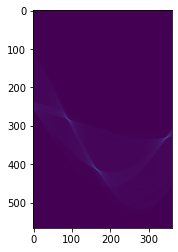

In [6]:
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)
print(h.shape, theta.shape, d.shape)
print(h.max())

plt.imshow(h)

# Return:
# hspace, angles, dists : tuple of array
# Peak values in hough space, angles and distances.
hspace, angles, dists = hough_line_peaks(h, theta, d)
print(hspace, angles, dists)

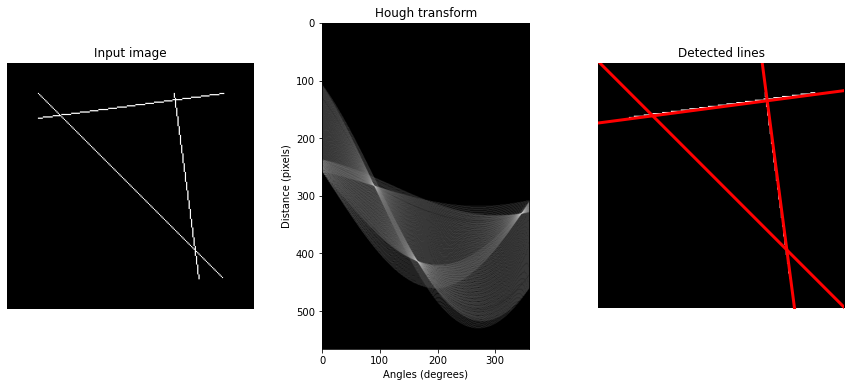

In [7]:
# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

# Display the Hough space
ax[1].imshow(np.log(1 + h), cmap=cm.gray)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for angle, dist in zip(angles, dists):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2), color='r', linewidth=3.0)

#plt.tight_layout()
plt.show()